In [475]:
import warnings
warnings.filterwarnings("ignore")

In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew

In [478]:
df = pd.read_csv('loan_level_500k.csv')
df.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [479]:
df.drop('LOAN_SEQUENCE_NUMBER', inplace=True, axis =1)

In [480]:
df.shape

(500137, 26)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 26 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

In [482]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CREDIT_SCORE,497426.0,712.536212,54.791262,300.000,676.000,719.0,756.000,839.0
FIRST_PAYMENT_DATE,500137.0,200025.430952,109.815541,199901.000,199904.000,200005.0,200105.000,201103.0
MATURITY_DATE,500137.0,203023.195872,110.384189,202402.000,202903.000,203004.0,203104.000,204101.0
METROPOLITAN_STATISTICAL_AREA,429988.0,30777.824739,11333.401144,10180.000,19740.000,33340.0,40420.000,49740.0
MORTGAGE_INSURANCE_PERCENTAGE,449089.0,7.744532,12.046546,0.000,0.000,0.0,18.000,55.0
NUMBER_OF_UNITS,500134.0,1.028890,0.218391,1.000,1.000,1.0,1.000,4.0
ORIGINAL_COMBINED_LOAN_TO_VALUE,500124.0,76.053571,15.139986,6.000,70.000,80.0,88.000,180.0
ORIGINAL_DEBT_TO_INCOME_RATIO,485208.0,32.917541,11.111800,1.000,25.000,33.0,41.000,65.0
ORIGINAL_UPB,500137.0,136493.484785,60968.743066,8000.000,89000.000,126000.0,176000.000,578000.0
ORIGINAL_LOAN_TO_VALUE,500128.0,75.710714,14.937717,6.000,70.000,80.0,85.000,100.0


Dropping irrelevant columns (Not Available during prediction)

In [483]:
df.drop(["FIRST_PAYMENT_DATE", "MATURITY_DATE", "MORTGAGE_INSURANCE_PERCENTAGE", "ORIGINAL_UPB", "ORIGINAL_INTEREST_RATE", "PREPAYMENT_PENALTY_MORTGAGE_FLAG"], inplace=True, axis=1)

In [484]:
print(df.isnull().sum().sort_values())

PRODUCT_TYPE                            0
SERVICER_NAME                           0
SELLER_NAME                             0
ORIGINAL_LOAN_TERM                      0
LOAN_PURPOSE                            0
PROPERTY_STATE                          0
PREPAID                                 0
CHANNEL                                 0
DELINQUENT                              0
OCCUPANCY_STATUS                        0
NUMBER_OF_UNITS                         3
ORIGINAL_LOAN_TO_VALUE                  9
ORIGINAL_COMBINED_LOAN_TO_VALUE        13
POSTAL_CODE                            31
PROPERTY_TYPE                          95
NUMBER_OF_BORROWERS                   247
CREDIT_SCORE                         2711
ORIGINAL_DEBT_TO_INCOME_RATIO       14929
METROPOLITAN_STATISTICAL_AREA       70149
FIRST_TIME_HOMEBUYER_FLAG          130559
dtype: int64


In [485]:
def missing_percentage(df):
    missing = pd.DataFrame(columns=['Category', 'Percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'Category':col, 'Percentage':percentage}, ignore_index = True)
    return missing

In [486]:
missingdata = missing_percentage(df)
missingdata.sort_values('Percentage', ascending=False)

,Category,Percentage
1,FIRST_TIME_HOMEBUYER_FLAG,26.104647
2,METROPOLITAN_STATISTICAL_AREA,14.025957
5,ORIGINAL_DEBT_TO_INCOME_RATIO,2.984982
0,CREDIT_SCORE,0.542051
9,NUMBER_OF_BORROWERS,0.049386
7,PROPERTY_TYPE,0.018995
8,POSTAL_CODE,0.006198
4,ORIGINAL_COMBINED_LOAN_TO_VALUE,0.002599
6,ORIGINAL_LOAN_TO_VALUE,0.0018
3,NUMBER_OF_UNITS,0.0006


In [487]:
df.FIRST_TIME_HOMEBUYER_FLAG.value_counts()

N    320418
Y     49160
Name: FIRST_TIME_HOMEBUYER_FLAG, dtype: int64

<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='Density'>

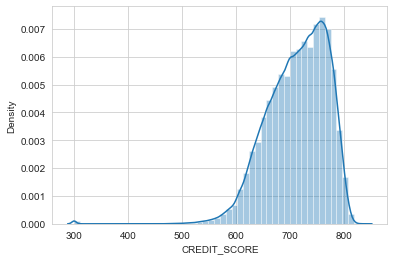

In [488]:
sns.distplot(df['CREDIT_SCORE'])

<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='DELINQUENT'>

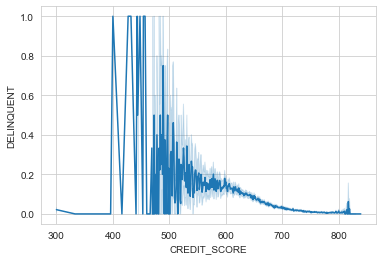

In [489]:
sns.lineplot(x='CREDIT_SCORE',y='DELINQUENT',data=df)

<AxesSubplot:>

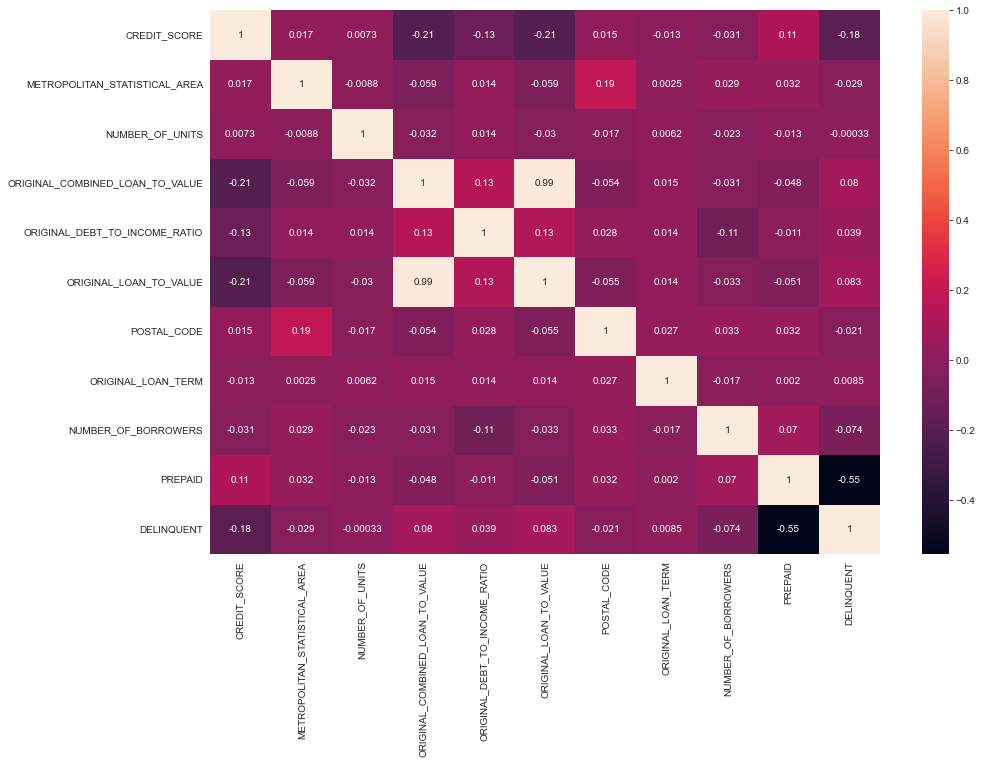

In [490]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

In [491]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['DELINQUENT']= label_encoder.fit_transform(df['DELINQUENT'])
df['PREPAID']= label_encoder.fit_transform(df['PREPAID'])
df['POSTAL_CODE'] = label_encoder.fit_transform(df['POSTAL_CODE'])
df['FIRST_TIME_HOMEBUYER_FLAG'] = label_encoder.fit_transform(df['FIRST_TIME_HOMEBUYER_FLAG'])

In [492]:
mylist = ['OCCUPANCY_STATUS', 'CHANNEL', 'PRODUCT_TYPE', 'PROPERTY_STATE',
          'PROPERTY_TYPE', 'LOAN_PURPOSE', 'SELLER_NAME', 'SERVICER_NAME']

In [493]:
# from category_encoders import TargetEncoder
#
# te = TargetEncoder()
# def trgenc(df, col):
#     df_fit = te.fit_transform(df[col], df['DELINQUENT'])
#     return df_fit.join(df.drop(columns=col, axis=1))

In [494]:
# for i in range(0,8):
#     df = trgenc(df, mylist[i])

In [495]:
col = df.columns
col

Index(['CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG',
       'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_LOAN_TO_VALUE', 'CHANNEL', 'PRODUCT_TYPE', 'PROPERTY_STATE',
       'PROPERTY_TYPE', 'POSTAL_CODE', 'LOAN_PURPOSE', 'ORIGINAL_LOAN_TERM',
       'NUMBER_OF_BORROWERS', 'SELLER_NAME', 'SERVICER_NAME', 'PREPAID',
       'DELINQUENT'],
      dtype='object')

In [496]:
SI = SimpleImputer(strategy='most_frequent')
df_out = SI.fit_transform(df)
df_out = pd.DataFrame(df_out, columns=col)

In [497]:
df_out.isnull().sum()

CREDIT_SCORE                       0
FIRST_TIME_HOMEBUYER_FLAG          0
METROPOLITAN_STATISTICAL_AREA      0
NUMBER_OF_UNITS                    0
OCCUPANCY_STATUS                   0
ORIGINAL_COMBINED_LOAN_TO_VALUE    0
ORIGINAL_DEBT_TO_INCOME_RATIO      0
ORIGINAL_LOAN_TO_VALUE             0
CHANNEL                            0
PRODUCT_TYPE                       0
PROPERTY_STATE                     0
PROPERTY_TYPE                      0
POSTAL_CODE                        0
LOAN_PURPOSE                       0
ORIGINAL_LOAN_TERM                 0
NUMBER_OF_BORROWERS                0
SELLER_NAME                        0
SERVICER_NAME                      0
PREPAID                            0
DELINQUENT                         0
dtype: int64

In [498]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df_fit = enc.fit_transform(df_out[mylist])

In [499]:
df_fit = pd.DataFrame(df_fit, columns=mylist)

In [500]:
df_out = df_fit.join(df_out.drop(columns=mylist, axis=1))

In [501]:
df_out = df_out.astype(np.int64)
X = df_out.iloc[:,:-1]
y = df_out['DELINQUENT']

In [502]:
y.value_counts().to_frame().T

,0,1
DELINQUENT,482146,17991


In [503]:
# from sklearn.feature_selection import VarianceThreshold

In [504]:
# var_thres = VarianceThreshold(threshold=0)
# var_thres.fit(X)

In [505]:
# sum(var_thres.get_support())
# constant_col = [column for column in X.columns
#                 if column not in X.columns[var_thres.get_support()]]

In [506]:
# X.drop(constant_col, axis=1, inplace=True)
# X.info()

Feature Selection - PCA

In [507]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)

X = pca.fit_transform(X)


explained_variance = pca.explained_variance_ratio_

SMOTE approach

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [509]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [510]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [511]:
# from sklearn.feature_selection import SequentialFeatureSelector
# sffs = SequentialFeatureSelector(XGBClassifier(),
#            k_features=(3,11),
#            forward=True,
#            floating=True,
#            cv=0)
# sffs.fit(X, y)
# sffs.k_feature_names_

ML MODEL - XGBOOST

In [512]:
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X,label=y)

xgb_model = XGBClassifier()

Ensemble approach model

In [513]:
# X_traine, X_teste, y_traine, y_teste = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#

In [514]:
# y_traine.value_counts()

In [515]:
# 337501/27
#

In [516]:
# dfen_class0 = df_out[df_out.DELINQUENT==0]
# dfen_class1 = df_out[df_out.DELINQUENT==1]

In [517]:
# def get_train_batch(df_major, df_minor, start, end):
#     df_train = pd.concat([df_major[start:end], df_minor], axis=0)
#
#     X_train = df_train.drop('DELINQUENT', axis='columns')
#     y_train = df_train.DELINQUENT
#
#     return X_train, y_train

In [518]:
# for i in range(0,26):

SMOTE approach model

In [519]:
xgb_model.fit(X_scaled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [520]:
y_pred = xgb_model.predict(X_test)

In [521]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    149807
           1       0.00      0.03      0.00       235

    accuracy                           0.96    150042
   macro avg       0.50      0.50      0.49    150042
weighted avg       1.00      0.96      0.98    150042



In [522]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
          'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
            num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [523]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.550732,0.011097,0.548837,0.008866
1,0.592022,0.013808,0.587150,0.016807
2,0.611307,0.025948,0.607479,0.028067
3,0.624110,0.020046,0.621089,0.020325
4,0.682365,0.059153,0.681931,0.059849
5,0.734474,0.049079,0.732358,0.048296
6,0.739034,0.048418,0.736426,0.048645
7,0.774920,0.005874,0.772142,0.007626
8,0.772804,0.006791,0.769836,0.008406
9,0.772624,0.007089,0.768991,0.007742


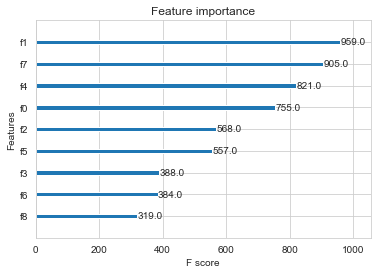

<Figure size 1152x864 with 0 Axes>

In [524]:
xgb.plot_importance(xgb_model)
plt.figure(figsize = (16, 12))
plt.show()

DL MODEL - SEQUENTIAL

In [525]:
import tensorflow as tf
from keras import Sequential

In [526]:
def ANN(X_train, y_train, X_test, y_test):
    model = Sequential([
        tf.keras.layers.Dense(26, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.build(input_shape=X_train.shape)
    history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))
    return history, y_preds

In [527]:
history, y_pred = ANN(X_train, y_train , X_test, y_test)

Epoch 1/50
1401/1401 [==============================] - 14s 8ms/step - loss: 8.2597 - accuracy: 0.9257 - val_loss: 2.7088 - val_accuracy: 0.9636
Epoch 2/50
1401/1401 [==============================] - 9s 7ms/step - loss: 2.2776 - accuracy: 0.9326 - val_loss: 0.6948 - val_accuracy: 0.9589
Epoch 3/50
1401/1401 [==============================] - 11s 8ms/step - loss: 2.0772 - accuracy: 0.9347 - val_loss: 4.5668 - val_accuracy: 0.9637
Epoch 4/50
1401/1401 [==============================] - 10s 7ms/step - loss: 1.7794 - accuracy: 0.9357 - val_loss: 0.4226 - val_accuracy: 0.9604
Epoch 5/50
1401/1401 [==============================] - 9s 7ms/step - loss: 1.8898 - accuracy: 0.9358 - val_loss: 0.9112 - val_accuracy: 0.9603
Epoch 6/50
1401/1401 [==============================] - 9s 6ms/step - loss: 1.5027 - accuracy: 0.9374 - val_loss: 1.2164 - val_accuracy: 0.9613
Epoch 7/50
1401/1401 [==============================] - 9s 6ms/step - loss: 1.3807 - accuracy: 0.9384 - val_loss: 0.4257 - val_accura

KeyboardInterrupt: 

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Under Sample

In [ ]:
count_class_0, count_class_1 = df_out.DELINQUENT.value_counts()

df_class_0 = df_out[df_out['DELINQUENT'] == 0]
df_class_1 = df_out[df_out['DELINQUENT'] == 1]

In [ ]:
df_class_0.shape

In [ ]:
df_class_1.shape

In [ ]:
count_class_0, count_class_1

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)
df_test_under.shape

In [ ]:
print("Random under-sampling")
print(df_test_under.DELINQUENT.value_counts())

In [ ]:
df_test_under.DELINQUENT = df_test_under.DELINQUENT.astype(np.int64)

In [ ]:
X1 = df_test_under.drop('DELINQUENT', axis = 1)
y1 = df_test_under['DELINQUENT']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=15, stratify=y1)

In [ ]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

In [ ]:
history1, y_pred1 = ANN(X_train1, y_train1, X_test1 , y_test1)